In [21]:
import sys
import seaborn as sns
import os
import glob
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import avalanches as crfn
import admin_functions as adfn
import plot as pltfn
import scipy
import extract as xfn
from scipy import stats 
import IS as isfn

sns.reset_orig()
#plt.style.use('dark_background')
%load_ext autoreload
%autoreload

# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'
experiment = 'PTZ-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 

sys.version

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'3.7.6 (default, Jan  8 2020, 13:42:34) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

In [22]:
# Avalanche calculation
#---------------------------------------------------------------------------
bln_binlist = sorted(glob.glob('bln_short*')) #iterated list - binarised trace
sub_bln_nnblist, bln_binlist

(array(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_0.16nnb.npy',
        'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_0.16nnb.npy',
        'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_0.16nnb.npy',
        'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_0.16nnb.npy',
        'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_0.16nnb.npy',
        'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_0.16nnb.npy',
        'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_0.16nnb.npy',
        'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_0.16nnb.npy',
        'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_0.16nnb.npy'],
       dtype='<U59'),
 ['bln_short_02_binarised.npy',
  'bln_short_04_binarised.npy',
  'bln_short_05_binarised.npy',
  'bln_short_07_binarised.npy',
  'bln_short_08_binarised.npy',
  'bln_short_09_binarised.npy',
  'bln_short_10_binarised.npy',
  'bln_short_11_binarised.npy',
  'bln_short_12_binarised.npy'])

In [23]:
# Avalanche calculation
#---------------------------------------------------------------------------
pre_binlist = sorted(glob.glob('pre_short*')) #iterated list - binarised trace
gen_nnblist, pre_binlist

(array(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
        'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
        'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
        'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
        'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
        'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
        'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
        'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
        'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy'],
       dtype='<U61'),
 ['pre_short_02_binarised.npy',
  'pre_short_04_binarised.npy',
  'pre_short_05_binarised.npy',
  'pre_short_07_binarised.npy',
  'pre_short_08_binarised.npy',
  'pre_short_09_binarised.npy',
  'pre_short_10_binarised.npy',
  'pre_short_11_binarised.npy',
  'pre_short_12_binarised.npy'])

In [24]:
bln_av = list(range(len(bln_binlist)))
pre_av = list(range(len(pre_binlist)))
p20_av = list(range(len(p20_binlist)))
for i in range(len(bln_binlist)):
    bln_av[i], pkg = crfn.avalanche_norecount(sub_bln_nnblist[i], bln_binlist[i], Fdrop, experiment)
    pre_av[i], pkg = crfn.avalanche_norecount(gen_nnblist[i], pre_binlist[i], Fdrop, experiment)
    p20_av[i], pkg = crfn.avalanche_norecount(gen_nnblist[i], p20_binlist[i], Fdrop, experiment)
    print('Done ' + str(i))

doing time step 0of400for fish 
doing time step 40of400for fish 
doing time step 80of400for fish 
doing time step 120of400for fish 
doing time step 160of400for fish 
doing time step 200of400for fish 
doing time step 240of400for fish 
doing time step 280of400for fish 
doing time step 320of400for fish 
doing time step 360of400for fish 


/Users/dominicburrows/Dropbox/PhD/Analysis/py_scripts/suite2p_analysis_py/avalanches.py:378: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  avframescut = framesvec[[avsize >=3]]


doing time step 0of400for fish 
doing time step 40of400for fish 
doing time step 80of400for fish 
doing time step 120of400for fish 
doing time step 160of400for fish 
doing time step 200of400for fish 
doing time step 240of400for fish 
doing time step 280of400for fish 
doing time step 320of400for fish 
doing time step 360of400for fish 
doing time step 0of400for fish 
doing time step 40of400for fish 
doing time step 80of400for fish 
doing time step 120of400for fish 
doing time step 160of400for fish 
doing time step 200of400for fish 
doing time step 240of400for fish 
doing time step 280of400for fish 
doing time step 320of400for fish 
doing time step 360of400for fish 
Done 0
doing time step 0of400for fish 
doing time step 40of400for fish 
doing time step 80of400for fish 
doing time step 120of400for fish 
doing time step 160of400for fish 
doing time step 200of400for fish 
doing time step 240of400for fish 
doing time step 280of400for fish 
doing time step 320of400for fish 
doing time step 360

In [ ]:
for i in range(len(blnlist)):
    binvec = np.append(binvec, np.load(blnlist[i])[0])
mini = np.min(binvec)
maxi = np.max(binvec)
for i in range(len(blnlist)):
    avdistcut = np.load(blnlist[i])[0]
    binned=np.linspace(mini,maxi, 675000)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1)
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_title(str(np.mean(blnexp)), size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.xlim(right = 2.5)  
plt.show()

In [34]:
bln_av[0][0]

array([4, 3, 7, ..., 3, 3, 3])

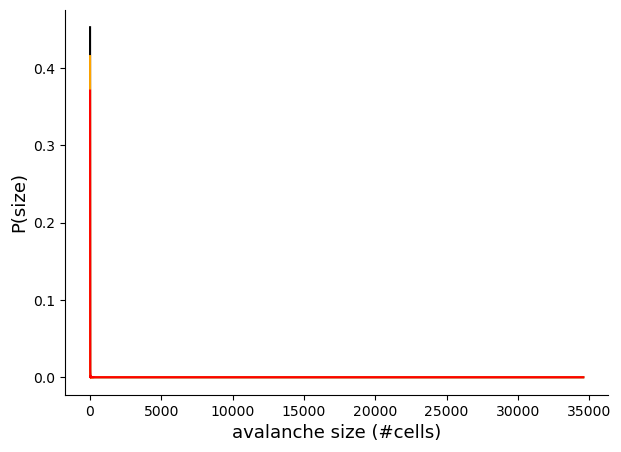

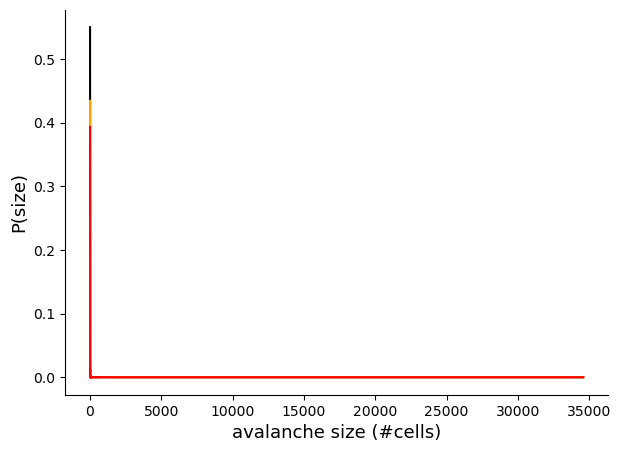

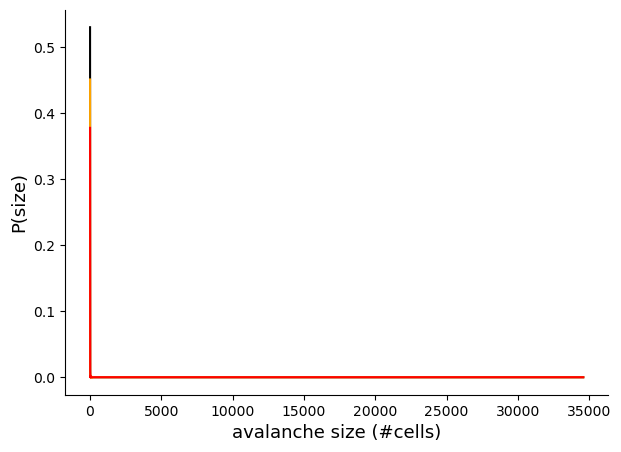

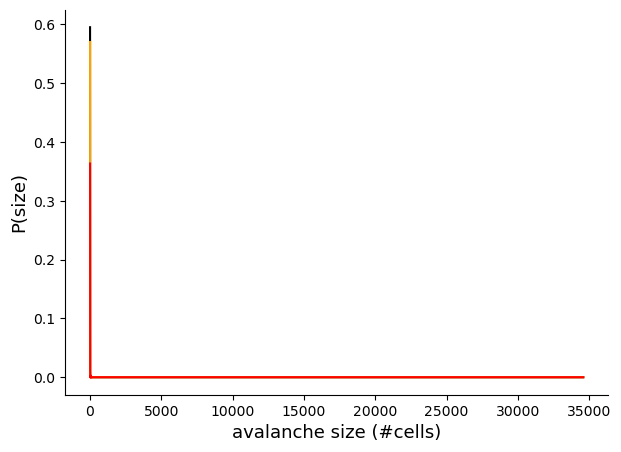

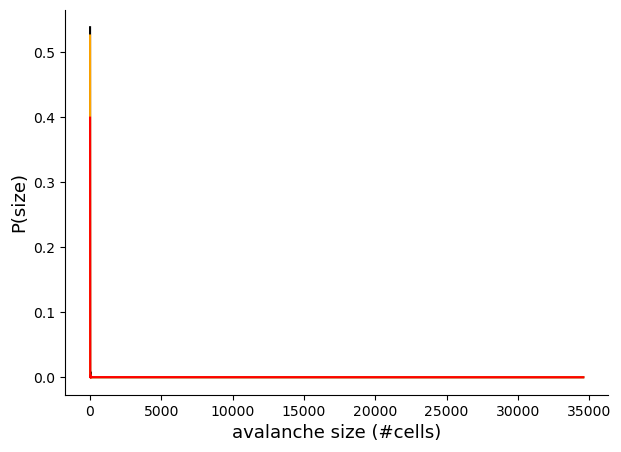

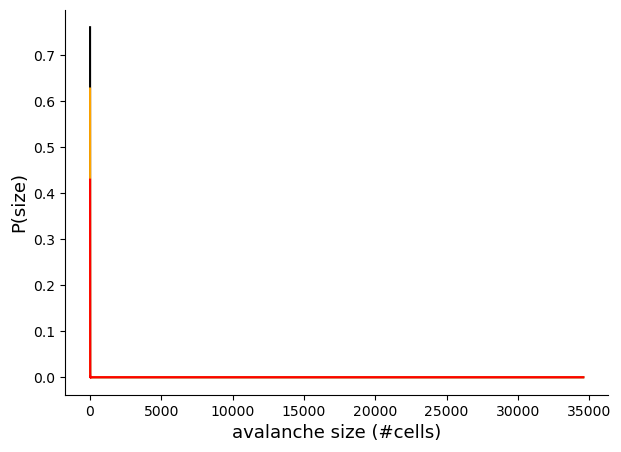

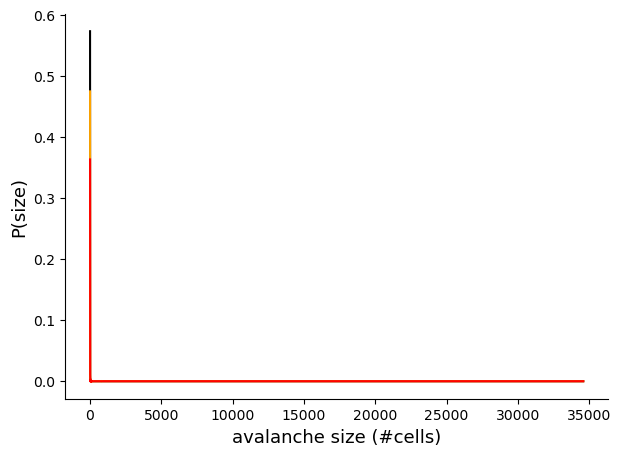

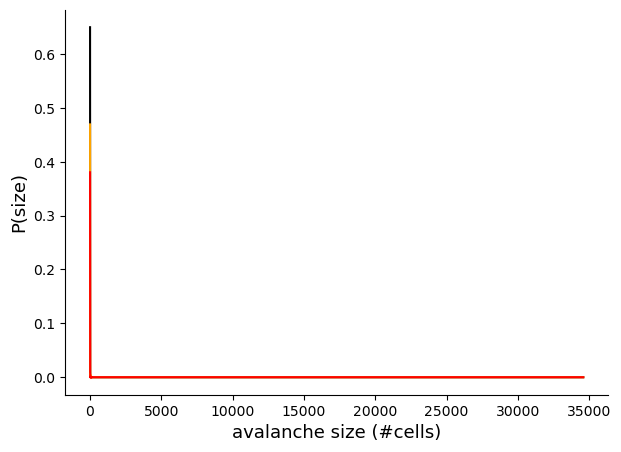

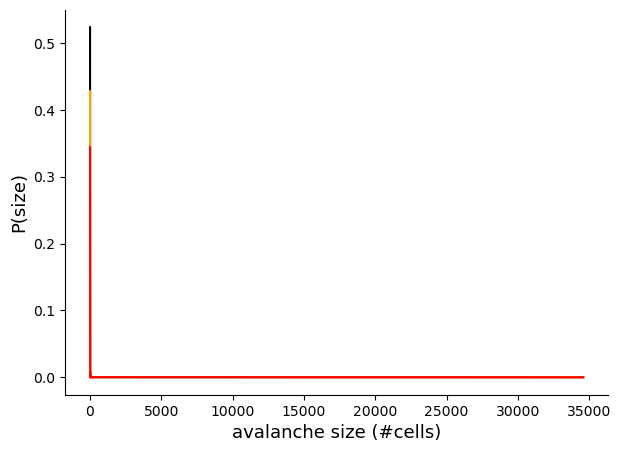

In [59]:
import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
colors = ['black', 'darkorange','orangered']
lines = ['-', '-', '-']
nbins = 36000
for i in range(len(bln_av)):
    fig, axarr = plt.subplots(figsize = (7,5))
    
    avdistcut = bln_av[i][0]
    binned=np.linspace(mini,maxi, nbins)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1, c = 'k')
    #powerlaw.plot_pdf(bln_av[i][0], linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
    
    avdistcut = pre_av[i][0]
    binned=np.linspace(mini,maxi, nbins)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1, c = 'orange')
    #powerlaw.plot_pdf(pre_av[i][0], linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orange')
    
    avdistcut = p20_av[i][0]
    binned=np.linspace(mini,maxi, nbins)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1, c = 'red')
    #powerlaw.plot_pdf(p20_av[i][0], linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'red')

    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    #plt.xlim(right = 100000)  
    #plt.ylim(bottom = 0.000005)  
    axarr.set_ylabel('P(size)', size = '13')
    axarr.set_xlabel('avalanche size (#cells)', size = '13')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.show()

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10


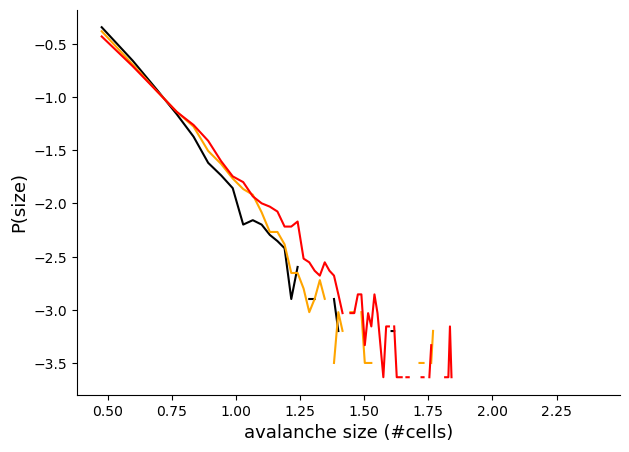

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10


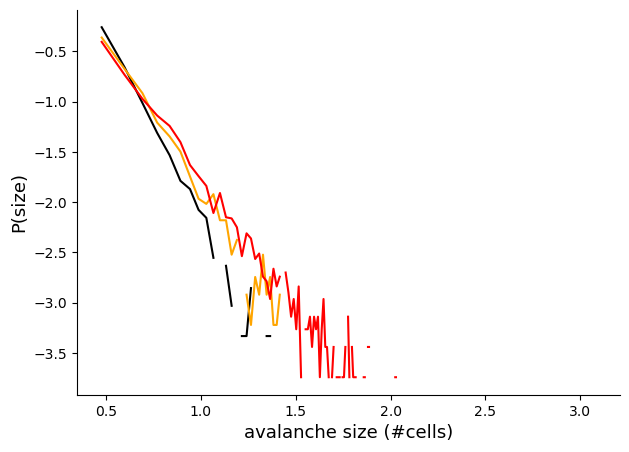

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10


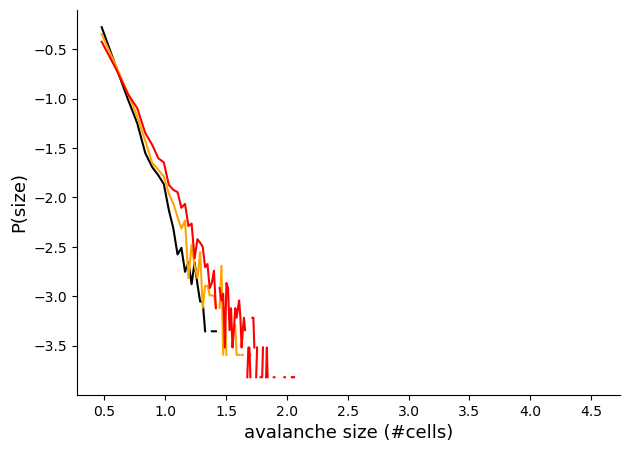

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10


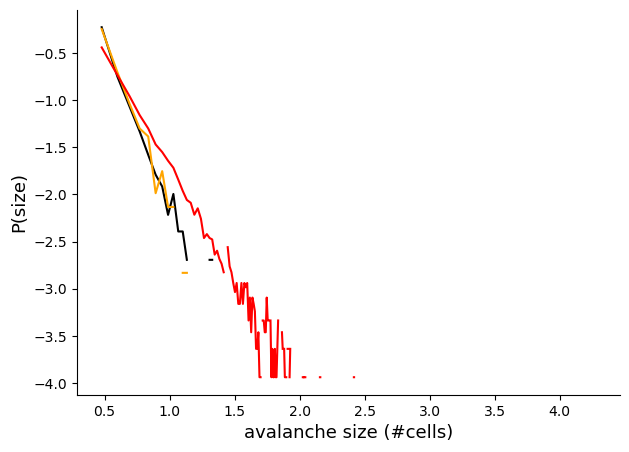

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10


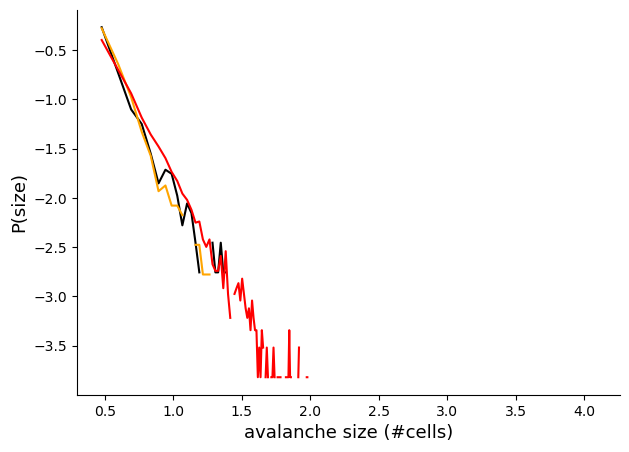

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10


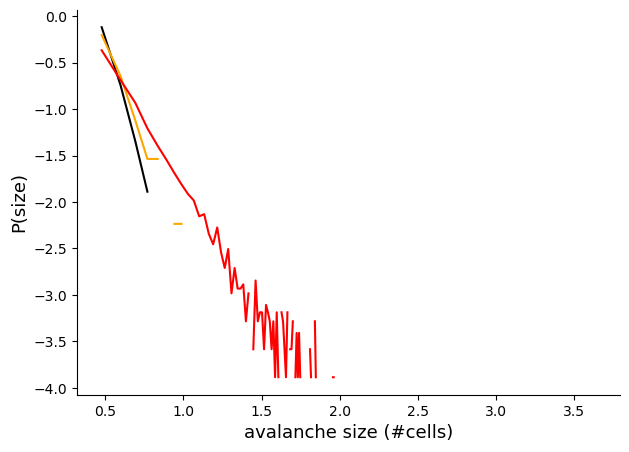

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10


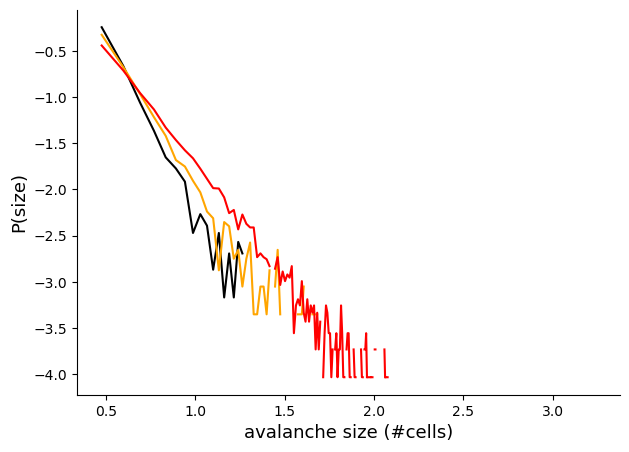

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10


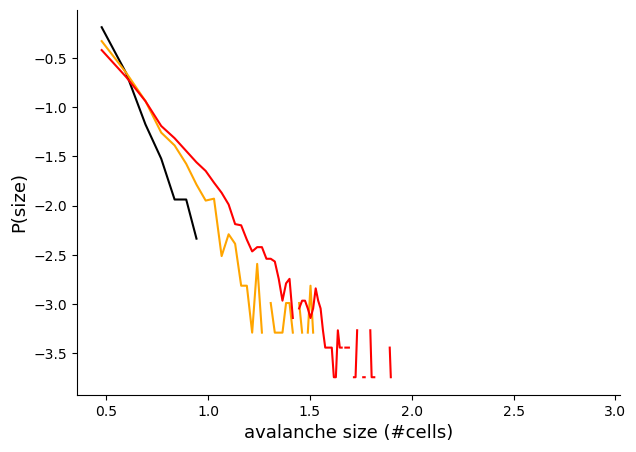

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10


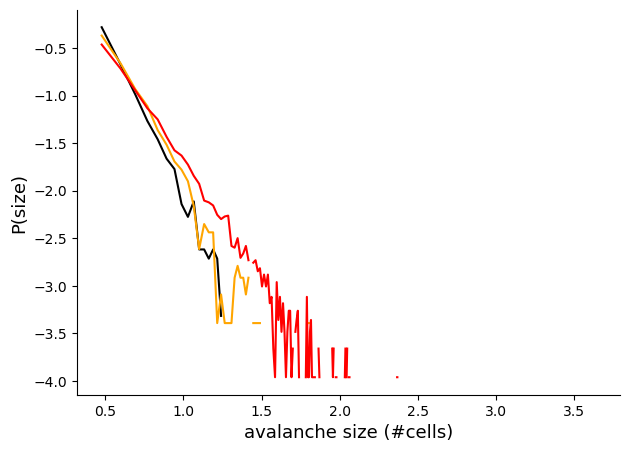

In [58]:
import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
colors = ['black', 'darkorange','orangered']
lines = ['-', '-', '-']
nbins = 36000
for i in range(len(bln_av)):
    fig, axarr = plt.subplots(figsize = (7,5))
    
    avdistcut = bln_av[i][0]
    binned=np.linspace(mini,maxi, nbins)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1, c = 'k')
    #powerlaw.plot_pdf(bln_av[i][0], linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
    
    avdistcut = pre_av[i][0]
    binned=np.linspace(mini,maxi, nbins)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1, c = 'orange')
    #powerlaw.plot_pdf(pre_av[i][0], linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orange')
    
    avdistcut = p20_av[i][0]
    binned=np.linspace(mini,maxi, nbins)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1, c = 'red')
    #powerlaw.plot_pdf(p20_av[i][0], linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'red')

    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    #plt.xlim(right = 100000)  
    #plt.ylim(bottom = 0.000005)  
    axarr.set_ylabel('P(size)', size = '13')
    axarr.set_xlabel('avalanche size (#cells)', size = '13')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.show()

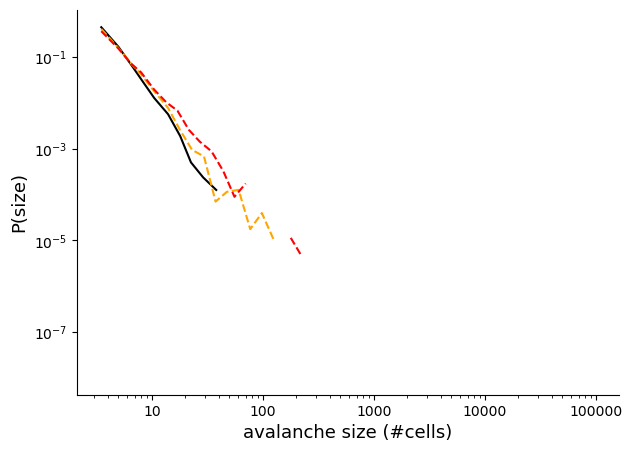

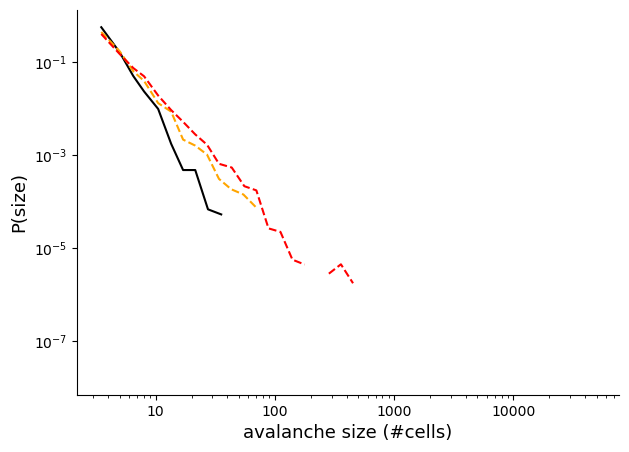

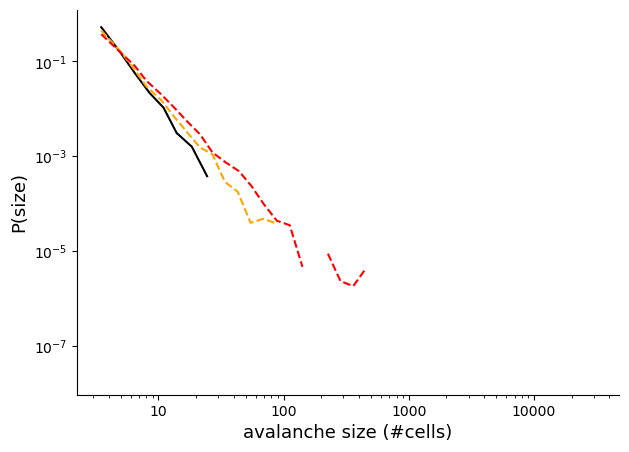

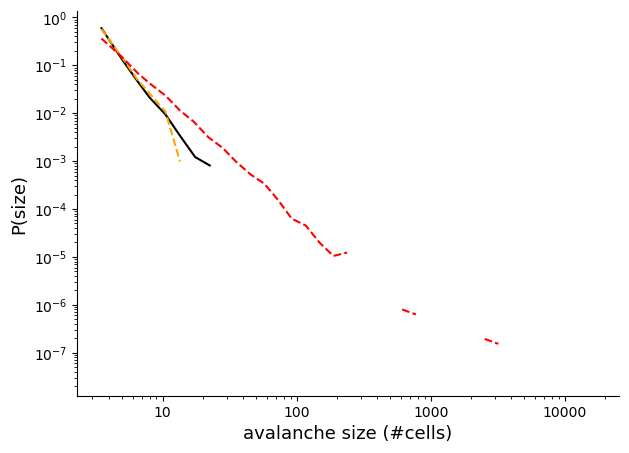

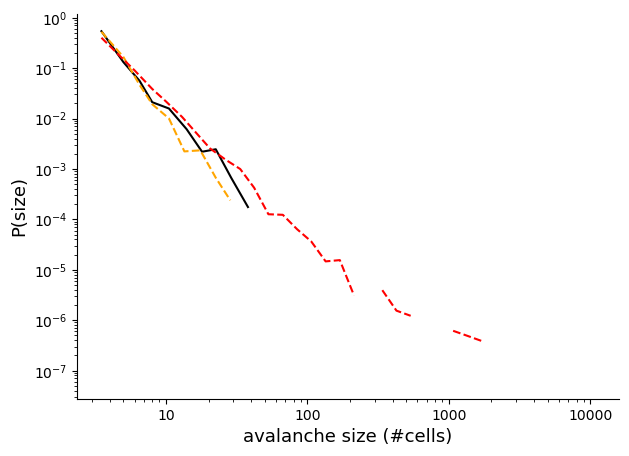

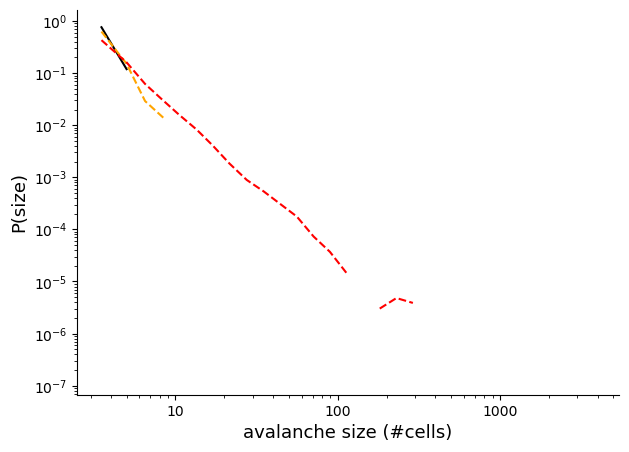

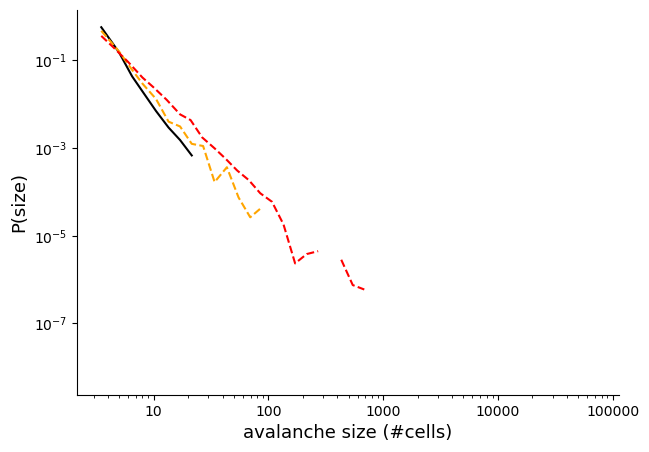

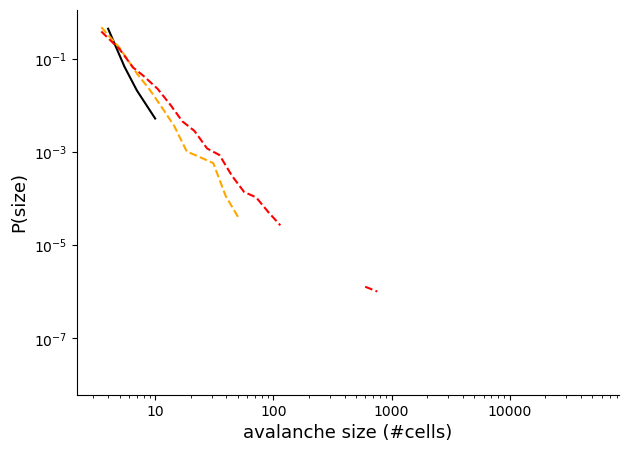

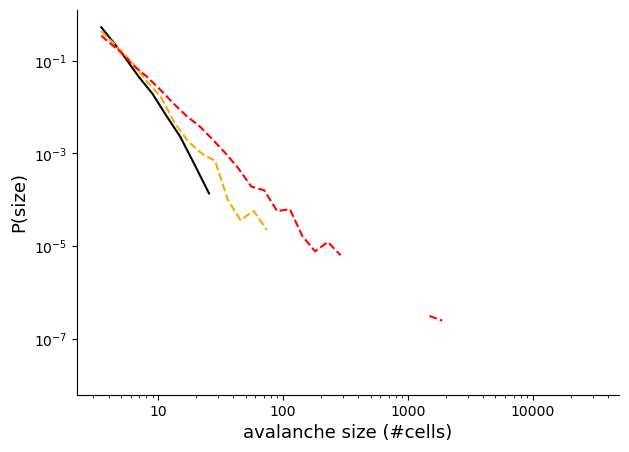

In [27]:
import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
colors = ['black', 'darkorange','orangered']
lines = ['-', '-', '-']
choose=0
for i in range(len(bln_av)):
    fig, axarr = plt.subplots(figsize = (7,5))
    
    powerlaw.plot_pdf(bln_av[i][0], linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
    powerlaw.plot_pdf(pre_av[i][0], linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orange')
    powerlaw.plot_pdf(p20_av[i][0], linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'red')
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    #plt.xlim(right = 100000)  
    #plt.ylim(bottom = 0.000005)  
    axarr.set_ylabel('P(size)', size = '13')
    axarr.set_xlabel('avalanche size (#cells)', size = '13')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.show()

In [14]:
# Avalanche calculation
#---------------------------------------------------------------------------
p20_binlist = sorted(glob.glob('p20_short*')) #iterated list - binarised trace
gen_nnblist, p20_binlist

(array(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
        'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
        'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
        'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
        'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
        'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
        'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
        'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
        'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy'],
       dtype='<U61'),
 ['p20_short_02_binarised.npy',
  'p20_short_04_binarised.npy',
  'p20_short_05_binarised.npy',
  'p20_short_07_binarised.npy',
  'p20_short_08_binarised.npy',
  'p20_short_09_binarised.npy',
  'p20_short_10_binarised.npy',
  'p20_short_11_binarised.npy',
  'p20_short_12_binarised.npy'])

In [3]:
# Create lists of trace data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnraw = sorted(glob.glob('*BLN*_cutrealtrace.npy'))
p5raw = sorted(glob.glob('*PTZ05*_cutrealtrace.npy'))
p20raw = sorted(glob.glob('*PTZ20*_cutrealtrace.npy'))
blnbin = sorted(glob.glob('*BLN*binarised.npy'))
p20bin = sorted(glob.glob('*PTZ20*binarised.npy'))
blnnnb = sorted(glob.glob('*BLN*nnb*'))
p20nnb = sorted(glob.glob('*PTZ20*nnb*'))
blnraw, p20raw
blnbin, p20bin

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-BLN-PTZ05-PTZ20_run-01_binarised.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_0.590binarised.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01_0.590b

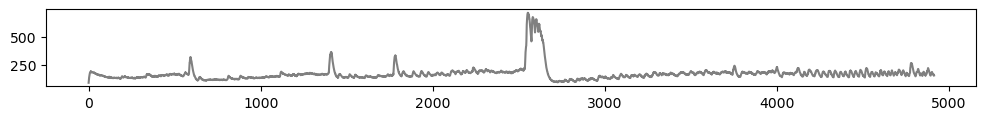

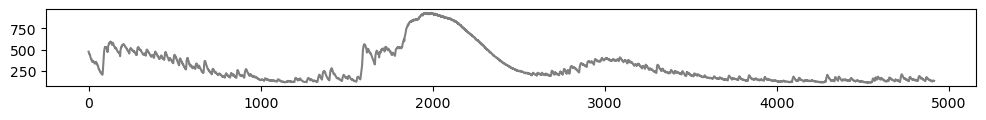

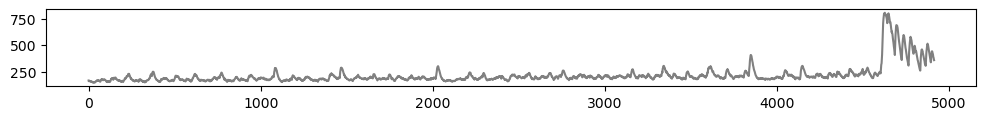

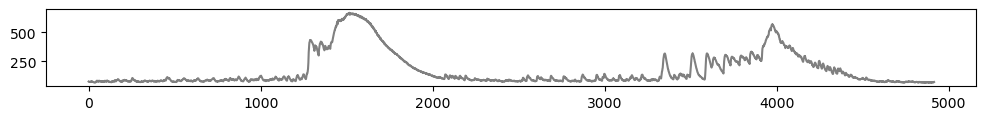

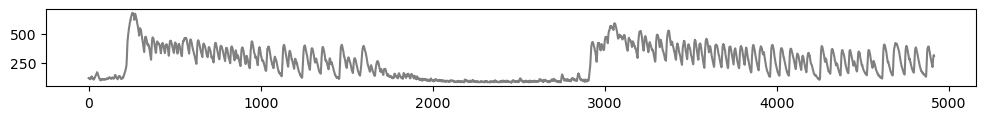

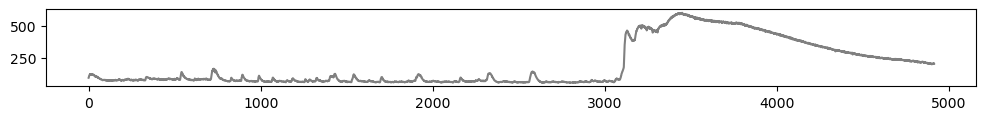

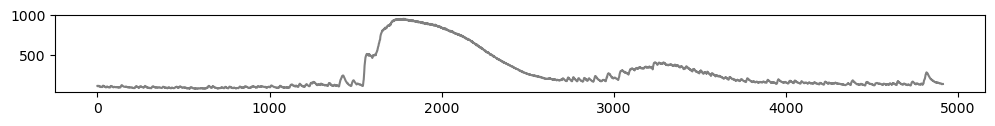

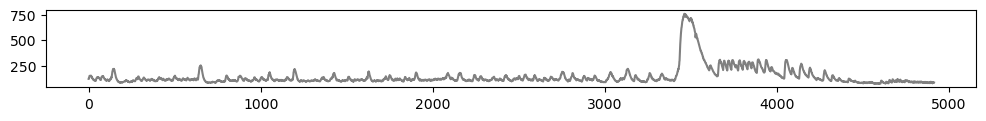

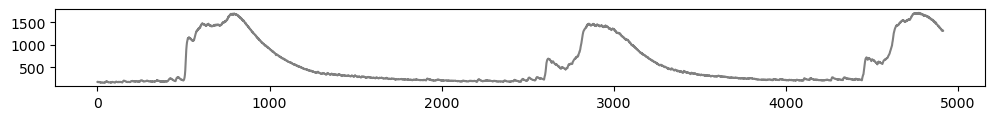

(array(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy'],
       dtype='<U66'),
 array(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_0.590binarised.npy',
        'PTZ-WILDTYPE-03_2photon_sess-01-BLN-PTZ05-PTZ20_run-01_binarised.npy',
        'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_0.590binarised.npy',
        'PTZ-WILDTYPE-06_2photon_se

In [4]:
#which traces have clear pre-ictal and generalised periods
gen_list, sub_bln_list , gen_blist, sub_bln_blist, gen_nnblist, sub_bln_nnblist, sub_p5_list = [],[],[],[],[],[],[]
for o in range(len(p20raw)):
    p20 = np.load(p20raw[o])
    mean = np.apply_along_axis(np.mean, 0, p20)
    mini, maxi = np.min(mean), np.max(mean)
    if 4*mini < maxi:
        fig, ax = plt.subplots(figsize= (12,1))  
        plt.plot(mean, c='grey')
        gen_list = np.append(gen_list, p20raw[o])
        gen_blist = np.append(gen_blist, p20bin[o])
        gen_nnblist = np.append(gen_nnblist, p20nnb[o])
        sub_bln_list = np.append(sub_bln_list, blnraw[o])
        sub_bln_blist = np.append(sub_bln_blist, blnbin[o])
        sub_bln_nnblist = np.append(sub_bln_nnblist, blnnnb[o])
        sub_p5_list = np.append(sub_p5_list, p5raw[o])
        plt.show()
gen_list, gen_blist, gen_nnblist

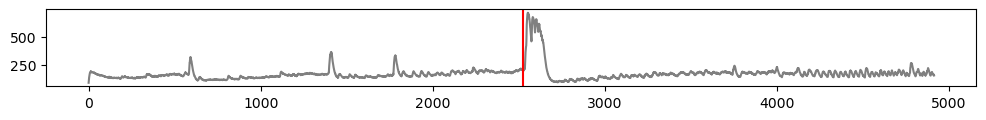

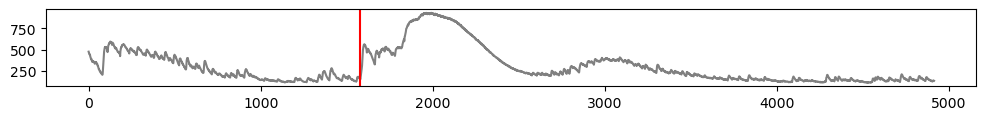

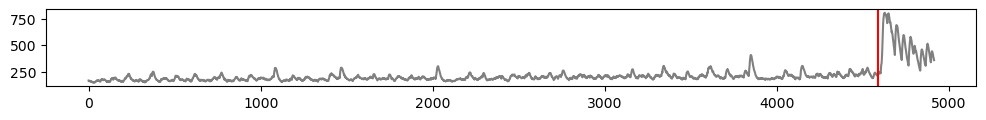

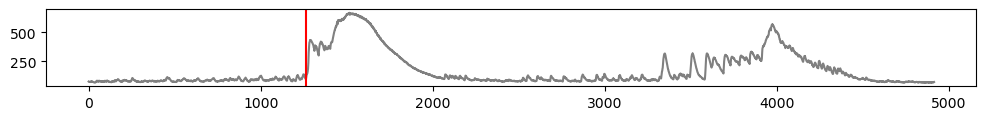

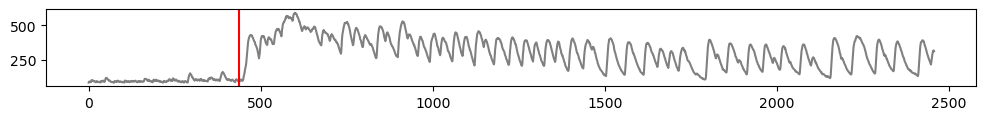

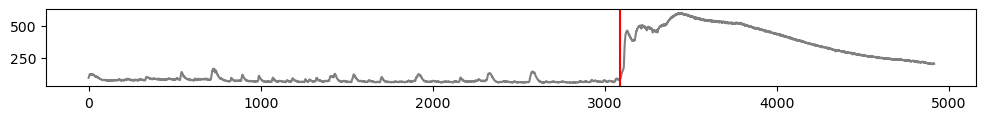

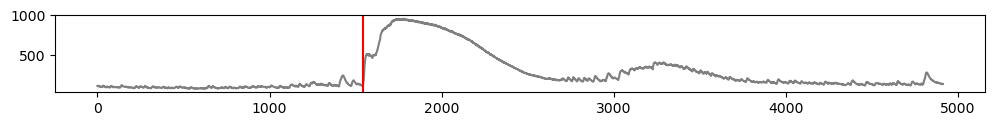

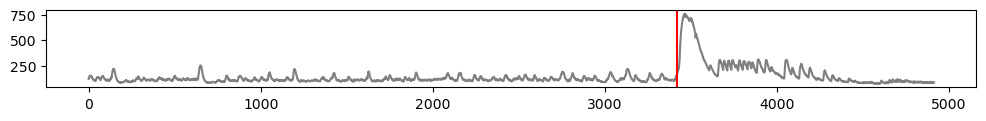

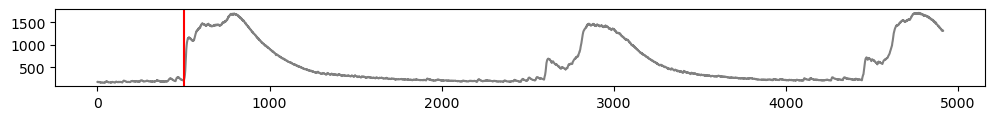

In [5]:
#IDENTIFY GENERALISED EVENT
max_list = list(range(len(gen_list)))
for o in range(len(gen_list)):
    p20 = np.load(gen_list[o])
    mean = np.apply_along_axis(np.mean, 0, p20)
    if o == 4:
        mean = mean[np.int(mean.shape[0]/2):]
    window = adfn.window(30, mean.shape[0])[0]
    diffs = list(range(mean.shape[0] - window))
    for t in range(mean.shape[0]):
        if t == mean.shape[0] - window:
            break
        diff_vec = np.zeros(window)
        for e in range(window):
            diff_vec[e] = mean[t+e] - mean[t] 
        diffs[t] = diff_vec
    
    sums, maxs = list(range(len(diffs))),list(range(len(diffs)))
    for i in range(len(diffs)):
        maxs[i] = np.max(diffs[i])

    fig, ax = plt.subplots(figsize= (12,1))  
    when = np.where(maxs ==  np.max(maxs))[0]
    plt.plot(mean, c = 'grey')
    for x in when: plt.axvline(x=x, c='red')
    max_list[o] = np.where(maxs ==  np.max(maxs))[0]
    plt.show()

In [6]:
#Time series for baseline, preictal, ictal analysis
import random
window = 400
bln_list, bln_blist = list(range(len(gen_list))),list(range(len(gen_list)))
pre_list, pre_blist = list(range(len(gen_list))),list(range(len(gen_list)))
p20_list, p20_blist = list(range(len(gen_list))),list(range(len(gen_list)))

for e in range(len(gen_list)):
    bln_ran = random.randint(0,4914-window)
    bln_list[e] = np.load(sub_bln_list[e])[:,bln_ran:bln_ran+window]
    bln_blist[e] = np.load(sub_bln_blist[e])[:,bln_ran:bln_ran+window]
    if e == 4:
        pre_list[e] = np.load(gen_list[e])[:,np.int(4914/2)+max_list[e][0]-window:np.int(4914/2)+max_list[e][0]]
        pre_blist[e] = np.load(gen_blist[e])[:,np.int(4914/2)+max_list[e][0]-window:np.int(4914/2)+max_list[e][0]]
        p20_list[e] = np.load(gen_list[e])[:,np.int(4914/2)+max_list[e][0]:np.int(4914/2)+max_list[e][0]+window]
        p20_blist[e] = np.load(gen_blist[e])[:,np.int(4914/2)+max_list[e][0]:np.int(4914/2)+max_list[e][0]+window]
    else:
        pre_list[e] = np.load(gen_list[e])[:,max_list[e][0]-window:max_list[e][0]]
        pre_blist[e] = np.load(gen_blist[e])[:,max_list[e][0]-window:max_list[e][0]]
        p20_list[e] = np.load(gen_list[e])[:,max_list[e][0]:max_list[e][0]+window]
        p20_blist[e] = np.load(gen_blist[e])[:,max_list[e][0]:max_list[e][0]+window]

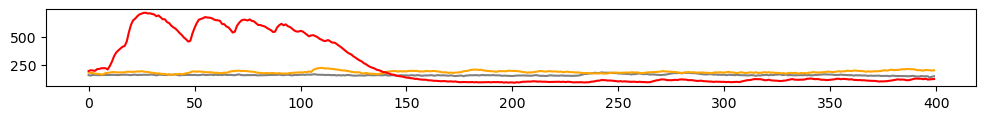

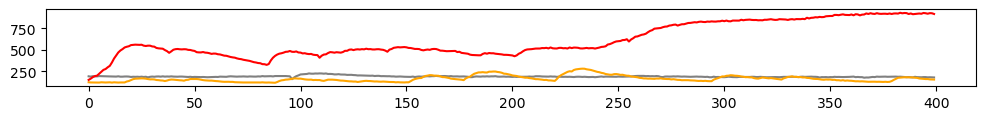

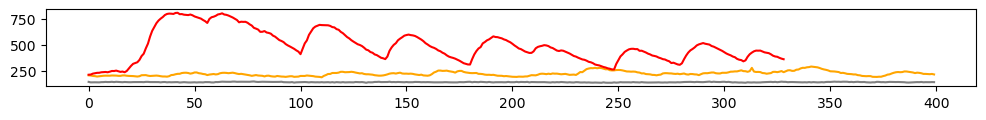

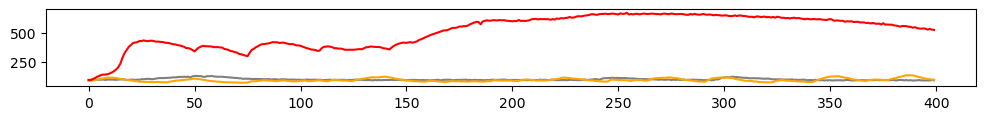

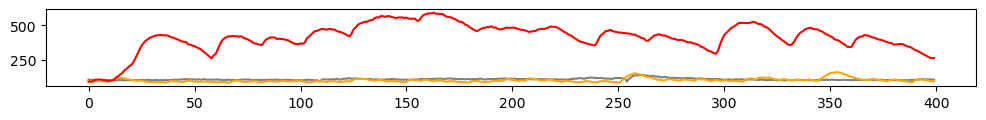

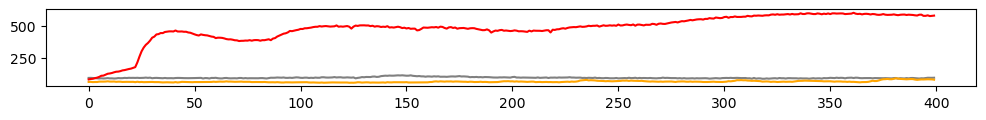

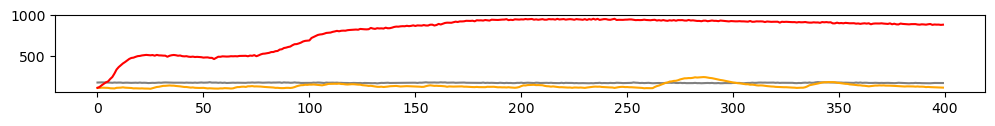

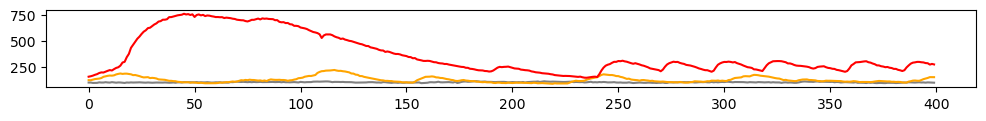

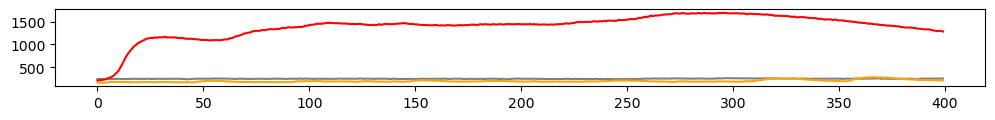

In [60]:
#Check time series
for i in range(len(bln_list)):
    fig, ax = plt.subplots(figsize= (12,1))  
    mean = np.apply_along_axis(np.mean, 0, bln_list[i])
    plt.plot(mean, c='grey')
    mean = np.apply_along_axis(np.mean, 0, pre_list[i])
    plt.plot(mean, c='orange')
    mean = np.apply_along_axis(np.mean, 0, p20_list[i])
    plt.plot(mean, c='red')
    plt.show()

In [ ]:
nnb = crfn.neighbour_r(nodes, 0.03, 6000, [1, 1, 1])
np.save('_nnb_0.03.npy', nnb)

experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
net_nnb = np.load(sorted(glob.glob('*net_model_nnb*'))[0])
net_nnb

In [67]:
wdt = 0.45 #spiking probability = 0.57
lamb = 0.5 #calcium decay = 0.5
varB = 0.001 #baseline variance = 0.001
varC = 1 #calcium variance = 1
Cmean = 0.2 #mean calcium = 0.2
frequency = 2.7 #frequency = 2.7
gausfilt = 0.6 #gausfilt = 0.6
mode = 'save'
listlist = [p20_list]
namelist = ['p20_short_0.45']
o_list = ['02', '04', '05', '07', '08', '09', '10', '11', '12']

for i in range(len(listlist)):
    for t in range(len(listlist[i])):
        name = namelist[i] + '_' + o_list[t]
        c, sks, B = xfn.bcl_function_parameters(wdt, Fdrop, experiment, name, listlist[i][t], lamb, varB, varC, Cmean, frequency, gausfilt, mode)
        print('Done ' + name)

Done p20_short_0.45_02
Done p20_short_0.45_04
Done p20_short_0.45_05
Done p20_short_0.45_07
Done p20_short_0.45_08
Done p20_short_0.45_09
Done p20_short_0.45_10
Done p20_short_0.45_11
Done p20_short_0.45_12


In [68]:
# Avalanche calculation
#---------------------------------------------------------------------------
p20_binlist = sorted(glob.glob('p20_short_0.45*')) #iterated list - binarised trace
gen_nnblist, p20_binlist

(array(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
        'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
        'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
        'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
        'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
        'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
        'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
        'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
        'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy'],
       dtype='<U61'),
 ['p20_short_0.45_02_binarised.npy',
  'p20_short_0.45_04_binarised.npy',
  'p20_short_0.45_05_binarised.npy',
  'p20_short_0.45_07_binarised.npy',
  'p20_short_0.45_08_binarised.npy',
  'p20_short_0.45_09_binarised.npy',
  'p20_short_0.45_10_binarised.npy',
  'p20_short_0.45_11_binarised.npy',
  'p20_short_0.45_12_bin

In [69]:
p20_avhi_45 = list(range(len(p20_binlist)))
for i in range(len(p20_binlist)):
    p20_avhi_45[i], pkg = crfn.avalanche(gen_nnblist[i], p20_binlist[i], Fdrop, experiment)
    print('Done ' + str(i))

doing time step 0of400for fish 
doing time step 40of400for fish 
doing time step 80of400for fish 
doing time step 120of400for fish 
doing time step 160of400for fish 
doing time step 200of400for fish 
doing time step 240of400for fish 
doing time step 280of400for fish 
doing time step 320of400for fish 
doing time step 360of400for fish 


/Users/dominicburrows/Dropbox/PhD/Analysis/py_scripts/suite2p_analysis_py/avalanches.py:502: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  avframescut = framesvec[[avsize >=3]]


Done 0
doing time step 0of400for fish 
doing time step 40of400for fish 
doing time step 80of400for fish 
doing time step 120of400for fish 
doing time step 160of400for fish 
doing time step 200of400for fish 
doing time step 240of400for fish 
doing time step 280of400for fish 
doing time step 320of400for fish 
doing time step 360of400for fish 
Done 1
doing time step 0of329for fish 
doing time step 33of329for fish 
doing time step 66of329for fish 
doing time step 99of329for fish 
doing time step 132of329for fish 
doing time step 165of329for fish 
doing time step 198of329for fish 
doing time step 231of329for fish 
doing time step 264of329for fish 
doing time step 297of329for fish 
Done 2
doing time step 0of400for fish 
doing time step 40of400for fish 
doing time step 80of400for fish 
doing time step 120of400for fish 
doing time step 160of400for fish 
doing time step 200of400for fish 
doing time step 240of400for fish 
doing time step 280of400for fish 
doing time step 320of400for fish 
doing 

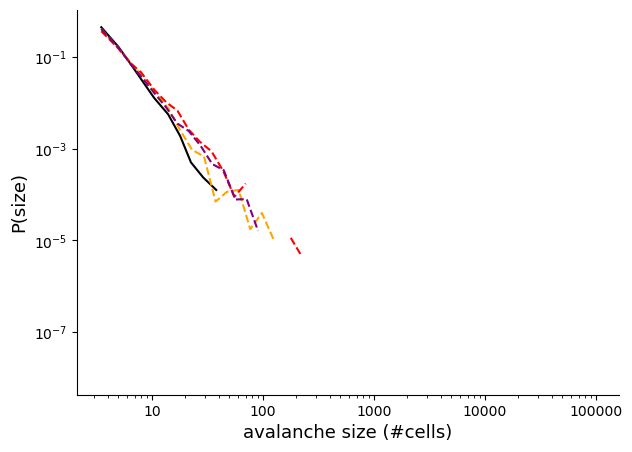

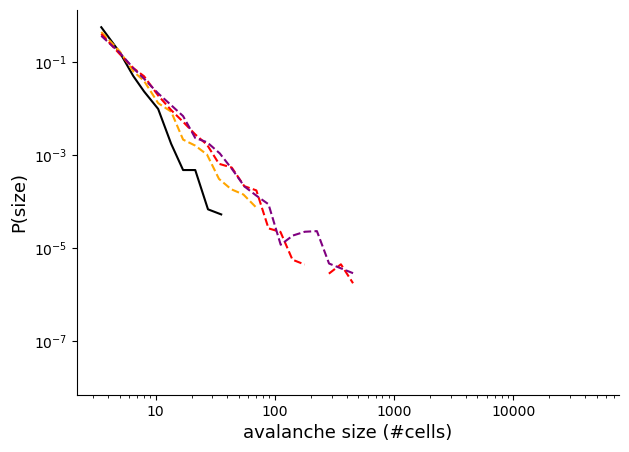

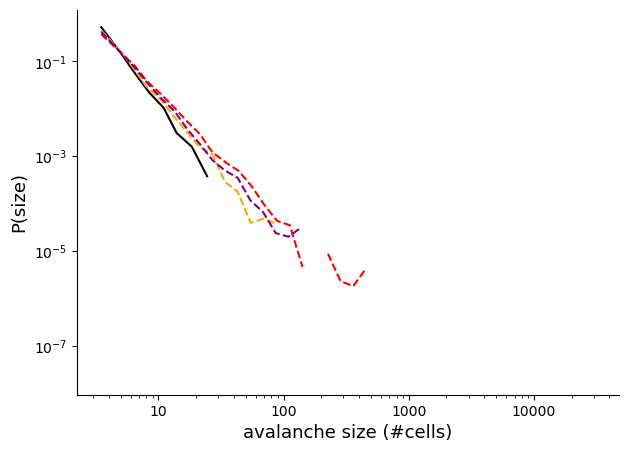

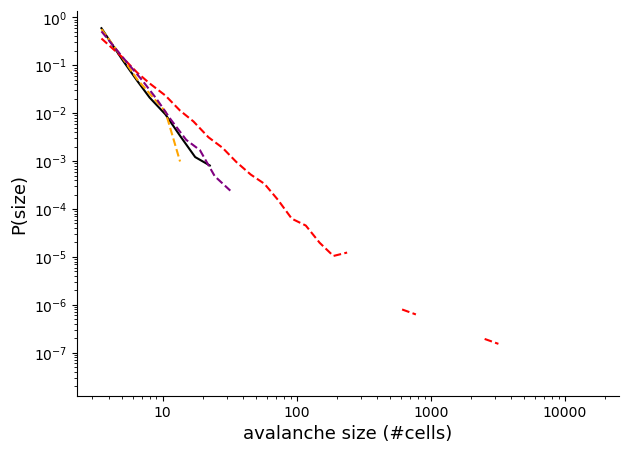

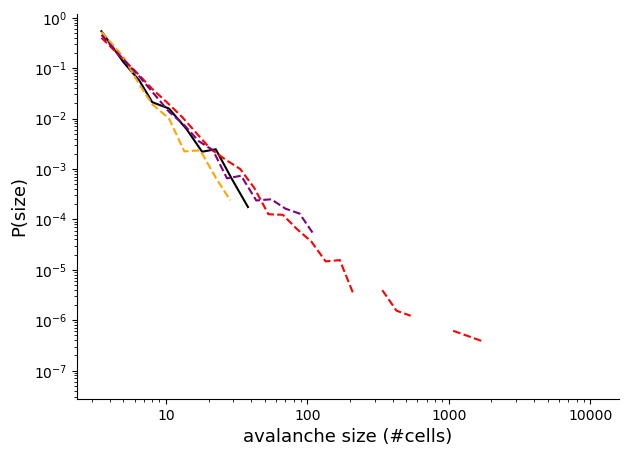

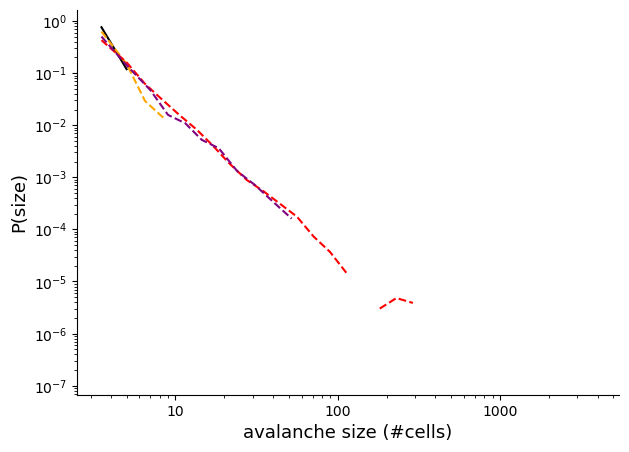

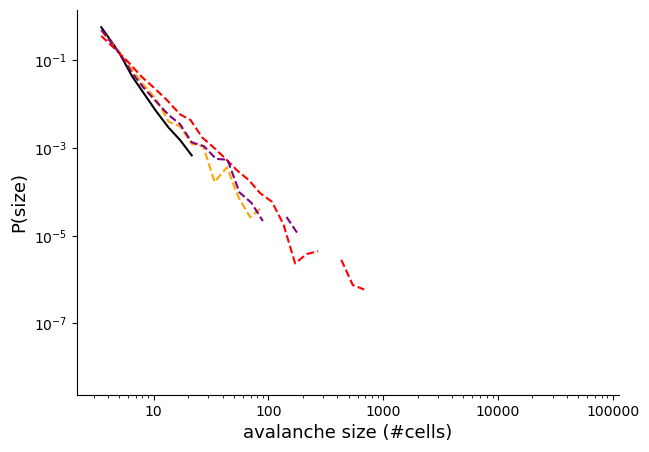

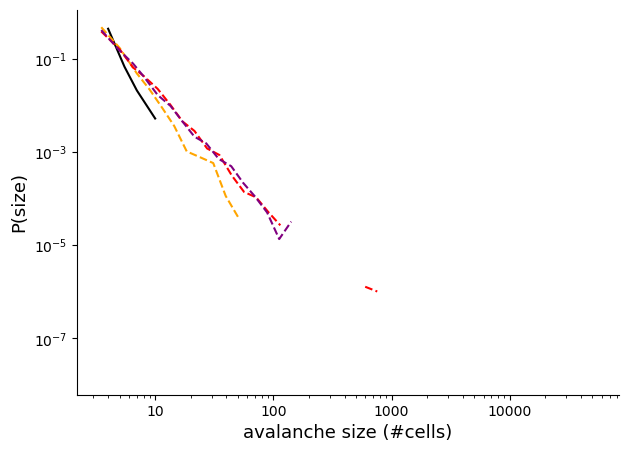

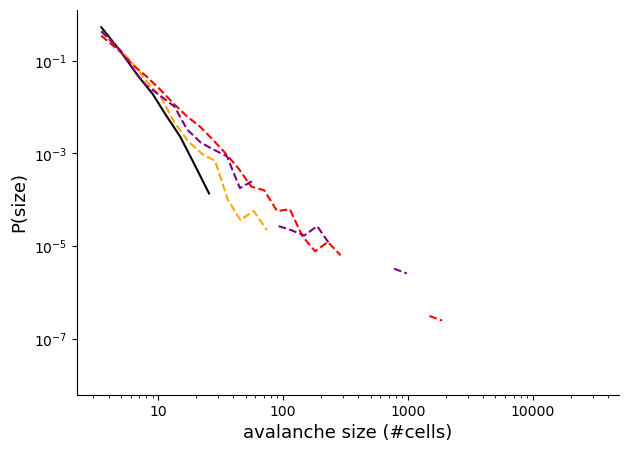

In [71]:
import matplotlib
import powerlaw
choose=0
for i in range(len(p20_av)):
    fig, axarr = plt.subplots(figsize = (7,5))
    
    powerlaw.plot_pdf(bln_av[i][0], linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')    
    powerlaw.plot_pdf(pre_av[i][0], linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orange')
    powerlaw.plot_pdf(p20_av[i][0], linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'red')
    powerlaw.plot_pdf(p20_avhi_45[i][0], linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'purple')
    
    #axarr.set_xscale('log')
    #axarr.set_yscale('log')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    #plt.xlim(right = 100000)  
    #plt.ylim(bottom = 0.000005)  
    axarr.set_ylabel('P(size)', size = '13')
    axarr.set_xlabel('avalanche size (#cells)', size = '13')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.show()

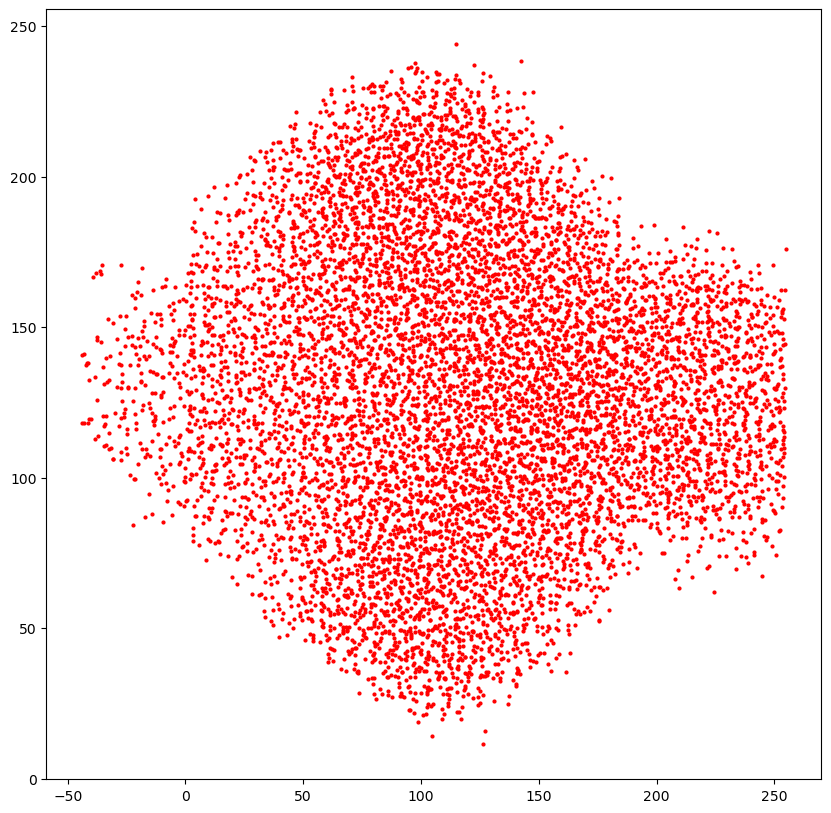

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances
import copy     

# Node coordinates
#---------------------------------------------------------------------------
os.chdir(Fdrop + 'Project/' + experiment)
node = sorted(glob.glob('knodes*'))
fig,axarr = plt.subplots(figsize = (10,10))
nodes = np.load(node[0])
axarr.scatter(nodes[:,0], nodes[:,1], s = 4, color = 'red' , alpha = 1)
plt.show()

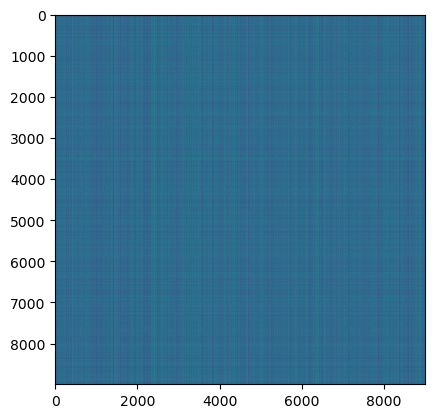

In [4]:
# K LIN + P LIN SCALE 
import numpy as np
import matplotlib.pyplot as plt
dist = euclidean_distances(nodes)
plt.imshow(dist)
plt.show()

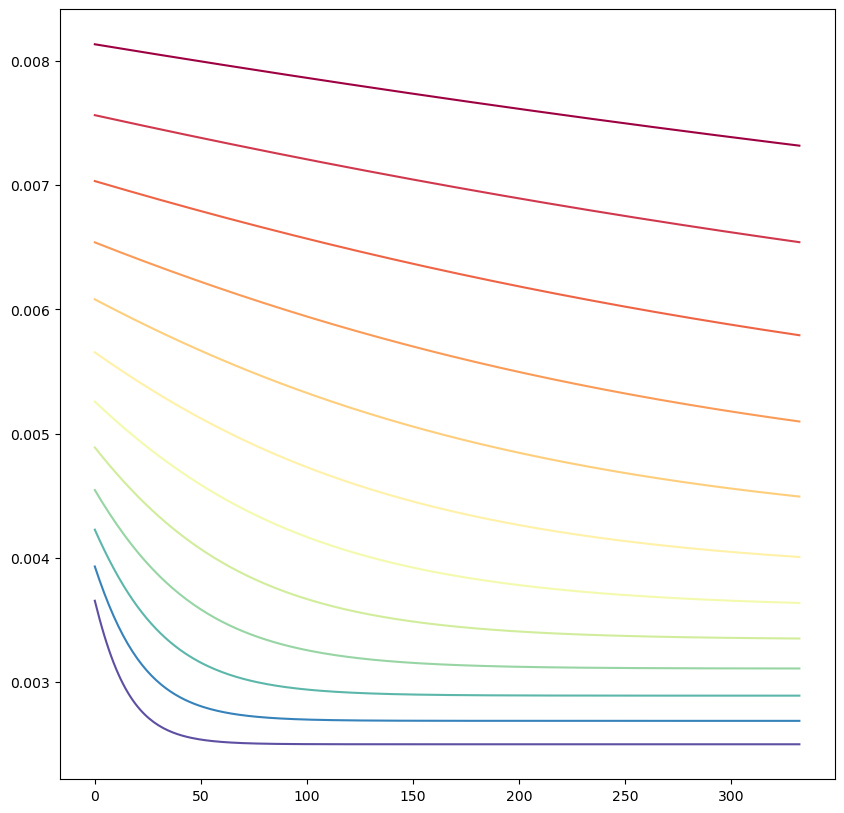

In [5]:
# Simple sigmoid function to 'soften' the exponential
#-------------------------------------------------------------------------------
def sig(x):
  return 1 / (1+np.exp(-x))

# Conversion from distance to edge weights, scaled (itself exponentially) by s
#-------------------------------------------------------------------------------
def dist2edge(distance, divisor, s):
  edgeweights = np.exp(s/5)*sig(np.exp(-soften/np.exp(s)*distance))/divisor
  return edgeweights

#S parameters
Nsteps  = 12
divisor = 200
soften = 0.07
s_vals   = np.array(np.linspace(0, 4, Nsteps)).tolist()

#Plot each s value
fig, ax = plt.subplots(1, figsize=(10,10))
colors  = cm.Spectral_r(np.linspace(0,1,Nsteps))
distance = np.linspace(0, np.max(dist), 300)
for s in range(len(s_vals)):
  ax.plot(distance, dist2edge(distance, divisor, s_vals[s]), c=colors[s])
plt.show()


In [6]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnlist = sorted(glob.glob('*BLN*_av.npy*'))[:1]
p20list = sorted(glob.glob('*PTZ20*_av.npy*'))[:1]

In [25]:
blnlist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_av.npy']

In [7]:
choose = 0
bln_distlist = [np.load(blnlist[i])[choose] for i in range(len(blnlist))]
p20_distlist = [np.load(p20list[i])[choose] for i in range(len(p20list))]
bln_vec = []
p20_vec = []
for i in range(len(bln_distlist)):
    bln_vec = np.append(bln_vec, bln_distlist[i])
    p20_vec = np.append(p20_vec, p20_distlist[i])

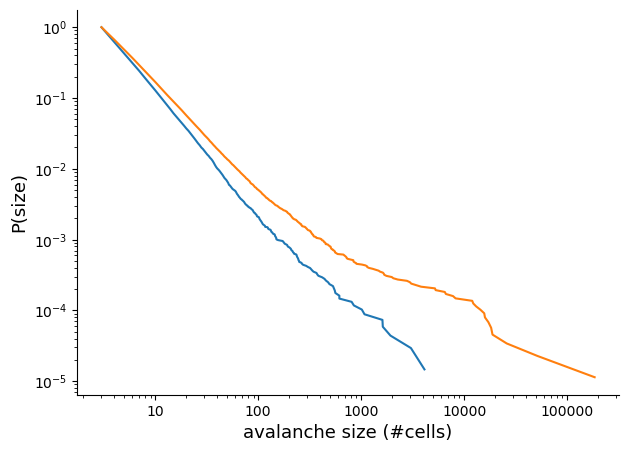

In [8]:
import matplotlib
import powerlaw
fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()
avdistcut = bln_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1)
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1)

axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [11]:
#Calculate number of simulatons to do - to have 95% chance of generating maximum avalanche
def num_sims(empirical, cutoff):
    import matplotlib.pyplot as plt
    import math
    fig, axarr = plt.subplots(figsize = (7,5))
    hist = axarr.hist(empirical, bins = 100000, density = True, histtype = 'step', cumulative = -1)
    p = 1-(10**(np.log10(hist[0])[np.where(np.log10(hist[1]) > np.log10(cutoff))[0][0]])) #probability of getting avalanches of size cutoff or smaller
    number = 0.05 
    base = p
    exponent = int(math.log(number, base)) #number of simulations as the power to which p is raised to get 95% probability 
    return(exponent)

#Simulation parameters
#======================
cutoff = 1000
n_sims= num_sims(bln_vec, cutoff)
n_sims

29156

In [56]:
#Check paramaters
s0 = s_vals[0]
k0 = 11

print('divisor = ' + str(divisor))
print('soften = ' + str(soften))
print('cutoff = ' + str(cutoff))
print('n_sims = ' + str(n_sims))
print('s0 = ' + str(s0))
print('k0 = ' + str(k0))

divisor = 200
soften = 0.07
cutoff = 1000
n_sims = 29156
s0 = 0.0
k0 = 11


In [ ]:
#Parameter sweep
from scipy.optimize import minimize
from scipy.optimize import brute
from scipy import stats
total_list = []
def ks_dist(params):
    print(params)  # <-- you'll see that params is a NumPy array
    s, k  = params # <-- for readability you may wish to assign names to the component variables
    avs = netfn.ba_netsim(dist).simulate(s, int(k), 0.6,  divisor, soften, cutoff, n_sims, 1).av_size
    ks = stats.ks_2samp(empirical, avs)[0]
    total_list.append([params, ks, avs])
    print('ks = ' + str(ks))
    return ks

#Define params
empirical = bln_vec
dist = dist
#initial_guess = [s0, k0]
#bnds = ( (0,5), (10, 100))
#result = minimize(ks_dist, initial_guess, bounds = bnds, method = 'BFGS')
ranges = (slice(0, 5, 0.1), slice(10, 35, 1))
result = brute(ks_dist, ranges)

In [104]:
os.chdir(Fdrop + 'Project/' + experiment)

costlist, paramlist, avlist = list(range(len(total_list))), list(range(len(total_list))), list(range(len(total_list)))
for i in range(len(total_list)):
    paramlist[i] = total_list[i][0]
    costlist[i] = total_list[i][1]
    avlist[i] = total_list[i][2]
    
np.save('optimise_brute_ksdistlow_ba_blnf1_params.npy',   paramlist)
np.save('optimise_brute_ksdistlow_ba_blnf1_cost.npy',    costlist)
np.save('optimise_brute_ksdistlow_ba_blnf1_avs.npy',  avlist)

print('iterations = ' + str(len(costlist)) + '  true min = ' + str(np.where(costlist == np.min(costlist))[0][0]))
print('min cost = ' + str(costlist[np.where(costlist == np.min(costlist))[0][0]]))
print('min params = ' + str(paramlist[np.where(costlist == np.min(costlist))[0][0]]))
curr = avlist[np.where(costlist == np.min(costlist))[0][0]]

iterations = 1651  true min = 313
min cost = 0.007743892213270764
min params = [ 1.2 23. ]


In [88]:
# Node coordinates
#---------------------------------------------------------------------------
os.chdir(Fdrop + 'Project/' + experiment)
param = sorted(glob.glob('optimise*'+ '*params.npy'))
cost = sorted(glob.glob('optimise*' + '*cost.npy'))
avs = sorted(glob.glob('optimise*' + '*avs.npy'))


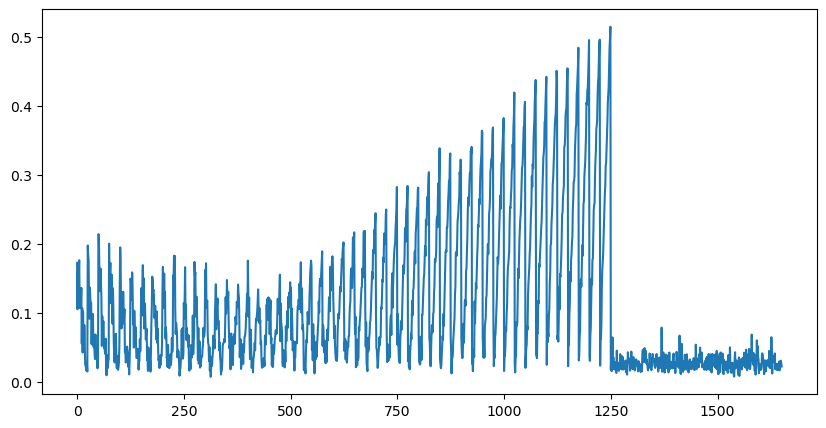

In [105]:
fig = plt.figure(figsize= (10,5))
plt.plot(np.arange(0, len(costlist)), costlist)
plt.show()

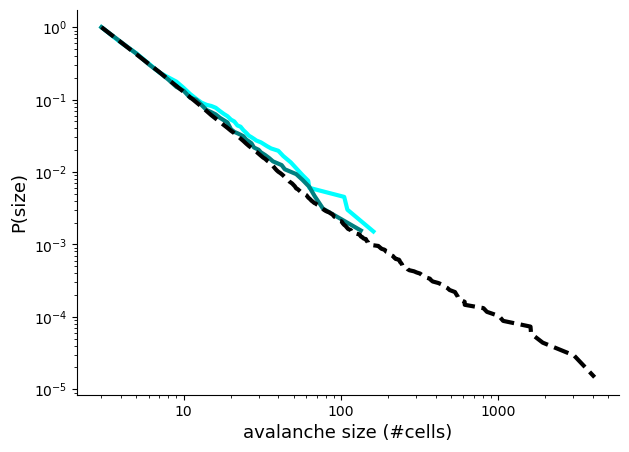

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances
import copy     
import scipy
os.chdir(F10t + 'Project/' + experiment)


import matplotlib
import powerlaw

fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()
                   

avdistcut = avlist[-1]
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =3 , markersize = 3, alpha = 1, c = 'cyan')

avdistcut = avlist[np.where(costlist == np.min(costlist))[0][0]]
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =3 , markersize = 3, alpha = 1, c = 'teal')

avdistcut = empirical
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =3 , markersize = 3, alpha = 1, c = 'k')
        
        
axarr.set_xscale('log')
axarr.set_yscale('log')    
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)

plt.show()

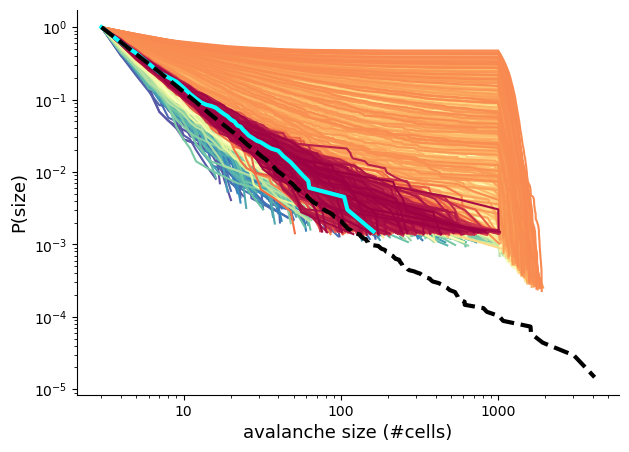

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances
import copy     
import scipy
os.chdir(F10t + 'Project/' + experiment)


colors = cm.Spectral_r(np.linspace(0, 1, len(total_list)))

#Cycle length - small network
import matplotlib
import powerlaw

fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()
                   
# Node coordinates
#---------------------------------------------------------------------------
for i in range(len(total_list)):
    av_dense = total_list[i][2]
    powerlaw.plot_ccdf(av_dense, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = colors[i])
    

avdistcut = total_list[-1][2]
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =3 , markersize = 3, alpha = 1, c = 'cyan')

avdistcut = empirical
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =3 , markersize = 3, alpha = 1, c = 'k')
        
        
axarr.set_xscale('log')
axarr.set_yscale('log')    
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)

plt.show()

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances
import copy     

# Node coordinates
#---------------------------------------------------------------------------
os.chdir(Fdrop + 'Project/' + experiment)
avlist = sorted(glob.glob('optimise*ks*ba+*avs.npy'))
costlist = sorted(glob.glob('optimise*ks*ba+*cost.npy'))
paramlist = sorted(glob.glob('optimise*ks*ba+*params.npy'))
avlist, costlist, paramlist

(['optimise_brute_ksdist_ba+re0.6_blnf1_avs.npy',
  'optimise_brute_ksdist_ba+re0.6_p20f1_avs.npy'],
 ['optimise_brute_ksdist_ba+re0.6_blnf1_cost.npy',
  'optimise_brute_ksdist_ba+re0.6_p20f1_cost.npy'],
 ['optimise_brute_ksdist_ba+re0.6_blnf1_params.npy',
  'optimise_brute_ksdist_ba+re0.6_p20f1_params.npy'])

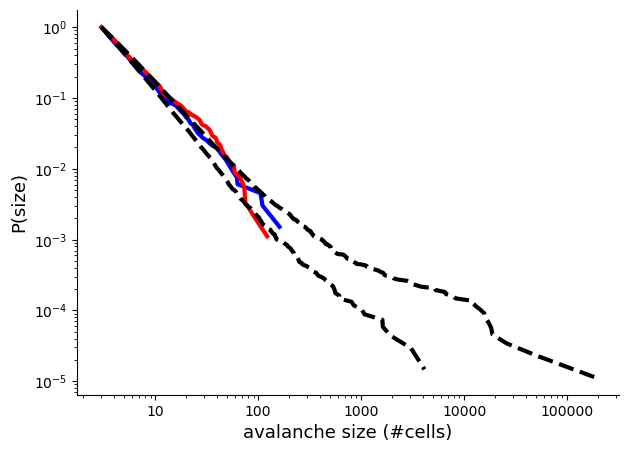

baseline = [ 1.20035156 24.42626953]
ptz = [ 2.91109167 18.81563224]


In [110]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances
import copy     
import scipy

import matplotlib
import powerlaw

fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()
                   
avdistcut = np.load(avlist[0], allow_pickle=True)[-1]
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =3 , markersize = 3, alpha = 1, c = 'blue')

avdistcut = np.load(avlist[1], allow_pickle=True)[-1]
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =3 , markersize = 3, alpha = 1, c = 'red')

avdistcut = bln_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =3 , markersize = 3, alpha = 1, c = 'k')

avdistcut =p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =3 , markersize = 3, alpha = 1, c = 'k')
        
        
axarr.set_xscale('log')
axarr.set_yscale('log')    
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)

plt.show()

print('baseline = ' + str(np.load(paramlist[0], allow_pickle=True)[-1]))
print('ptz = ' + str(np.load(paramlist[1], allow_pickle=True)[-1]))

In [ ]:
os.chdir(F10t + 'Project/' + experiment)
#Network parameters (k,p)
#=====================
kslist = np.zeros((len(k_vals), len(s_vals)))
for i in range(len(k_vals)):
    kname = '_k-' + str(k_vals[i]) 
    s_list = sorted(glob.glob('ba-net-paramsweep*' + kname + '-*' + 'av_size*'))
    for z in range(len(s_list)):
        av_sparse = scipy.sparse.load_npz(s_list[z])
        av_dense = np.array(av_sparse.todense())[0]
        empirical = bln_vec

        if len(av_dense) == 0:
            kslist[i, z] = 0
        else:
            kslist[i, z] = stats.ks_2samp(empirical, av_dense)[0]
            
            
#KS distance
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
curr = kslist[1:]
divnorm = colors.DivergingNorm(vmin=min(np.ravel(curr)), vcenter=np.median(np.ravel(curr)), vmax=max(np.ravel(curr)))
f, ax = plt.subplots(figsize = (8,5))
plot1 = ax.imshow(curr, cmap = 'Spectral_r', norm = divnorm)
ax.set_xlabel('s', size = '15')
ax.set_ylabel('k', size = '15')
#ax.locator_params(axis='y', nbins=10)
#ax.locator_params(axis='x', nbins=20)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'α')
plt.show()